# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#set up variables
names = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
count = 1

#start for loop to iterate through selected cities
for city in cities:
    # print count to keep track of row
    print(f"Processing {count} of {len(cities)} : {city}")
    
    # use try statement in case the city does not work in url
    try:
        #get url for each city
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
        weather_response = requests.get(url)
        weather_json = weather_response.json()
        
        # retrieve data
    
        name = country = weather_json["name"]
        lat = weather_json["coord"]["lat"]
        long = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        
        #add retrieved data to set
        names.append(name)
        lats.append(lat)
        lngs.append(long)
        max_temps.append(max_temp)
        humidities.append(humidity)
        cloudinesses.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
    
    #if error occurs, skip city
    except KeyError:
        print("City not found. Continuing ...")
    
    #add to count to keep track of row
    count=count+1

# final print   
print("-----------------------------------")
print("Data Retrieval Complete")

Processing 1 of 598 : taolanaro
City not found. Continuing ...
Processing 2 of 598 : kamina
Processing 3 of 598 : hamilton
Processing 4 of 598 : punta arenas
Processing 5 of 598 : cape town
Processing 6 of 598 : ca mau
Processing 7 of 598 : qaanaaq
Processing 8 of 598 : mehamn
Processing 9 of 598 : lagoa
Processing 10 of 598 : chokurdakh
Processing 11 of 598 : albany
Processing 12 of 598 : jamestown
Processing 13 of 598 : avarua
Processing 14 of 598 : narsaq
Processing 15 of 598 : nabire
Processing 16 of 598 : tsihombe
City not found. Continuing ...
Processing 17 of 598 : vaitupu
City not found. Continuing ...
Processing 18 of 598 : hilo
Processing 19 of 598 : illoqqortoormiut
City not found. Continuing ...
Processing 20 of 598 : vila do maio
Processing 21 of 598 : mys shmidta
City not found. Continuing ...
Processing 22 of 598 : ribeira grande
Processing 23 of 598 : ushuaia
Processing 24 of 598 : upernavik
Processing 25 of 598 : provideniya
Processing 26 of 598 : new norfolk
Processin

Processing 229 of 598 : kodiak
Processing 230 of 598 : sao joao da barra
Processing 231 of 598 : alice springs
Processing 232 of 598 : qaqortoq
Processing 233 of 598 : balykshi
Processing 234 of 598 : petatlan
Processing 235 of 598 : samarai
Processing 236 of 598 : mount isa
Processing 237 of 598 : dunedin
Processing 238 of 598 : buala
Processing 239 of 598 : pont-sainte-maxence
Processing 240 of 598 : port moresby
Processing 241 of 598 : faanui
Processing 242 of 598 : dakoro
Processing 243 of 598 : kasra
City not found. Continuing ...
Processing 244 of 598 : karakol
Processing 245 of 598 : novo aripuana
Processing 246 of 598 : port elizabeth
Processing 247 of 598 : santander
Processing 248 of 598 : quatre cocos
Processing 249 of 598 : malanville
Processing 250 of 598 : asau
Processing 251 of 598 : acarau
Processing 252 of 598 : poum
Processing 253 of 598 : gizo
Processing 254 of 598 : bandiagara
Processing 255 of 598 : nizhniy ingash
Processing 256 of 598 : lolua
City not found. Conti

Processing 463 of 598 : yerbogachen
Processing 464 of 598 : moron
Processing 465 of 598 : sola
Processing 466 of 598 : wufeng
Processing 467 of 598 : uglekamensk
Processing 468 of 598 : todos santos
Processing 469 of 598 : hastings
Processing 470 of 598 : chagda
City not found. Continuing ...
Processing 471 of 598 : miranorte
City not found. Continuing ...
Processing 472 of 598 : itarema
Processing 473 of 598 : great falls
Processing 474 of 598 : soyo
Processing 475 of 598 : khawhai
Processing 476 of 598 : bartlesville
Processing 477 of 598 : jumla
Processing 478 of 598 : verkhnevilyuysk
Processing 479 of 598 : mocambique
City not found. Continuing ...
Processing 480 of 598 : tostamaa
City not found. Continuing ...
Processing 481 of 598 : trairi
Processing 482 of 598 : svetlograd
Processing 483 of 598 : harper
Processing 484 of 598 : san cristobal
Processing 485 of 598 : baykit
Processing 486 of 598 : pangai
Processing 487 of 598 : vuktyl
Processing 488 of 598 : bereda
Processing 489 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#set up dataframes by zipping all sets made above

weather_df = pd.DataFrame(list(zip(names,lats,lngs,max_temps,humidities,cloudinesses,wind_speeds,countries)),columns=["name","lat","long","max_temp","humidity","cloudiness","wind_speed","country"])
weather_df

,name,lat,long,max_temp,humidity,cloudiness,wind_speed,country
0,Kamina,-8.7386,24.9906,58.77,39,99,4.43,CD
1,Hamilton,39.1834,-84.5333,92.50,47,20,1.01,US
2,Punta Arenas,-53.1500,-70.9167,42.91,75,0,14.97,CL
3,Cape Town,-33.9258,18.4232,62.10,56,0,8.05,ZA
4,Ca Mau,9.1769,105.1500,77.88,87,85,6.08,VN
...,...,...,...,...,...,...,...,...
544,Vardø,70.3705,31.1107,44.58,93,75,11.50,NO
545,Inírida,3.8653,-67.9239,77.52,83,99,3.20,CO
546,Hailey,43.5196,-114.3153,91.90,22,1,10.36,US
547,Tateyama,34.9833,139.8667,73.42,88,75,20.71,JP


In [6]:
# make sure humidity max is 100

weather_df.describe()

,lat,long,max_temp,humidity,cloudiness,wind_speed
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,19.181173,13.515462,71.718525,68.098361,52.346084,8.110984
std,32.765635,89.534578,14.325504,21.427807,38.814274,5.783037
min,-54.800000,-175.200000,35.260000,7.000000,0.000000,0.000000
25%,-7.913900,-65.222600,62.960000,56.000000,12.000000,3.850000
50%,22.316700,16.816700,73.240000,73.000000,54.000000,6.820000
75%,46.433300,83.983300,81.570000,83.000000,92.000000,11.500000
max,78.218600,179.316700,109.580000,100.000000,100.000000,35.410000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#NO HUMIDITY ABOVE 100

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

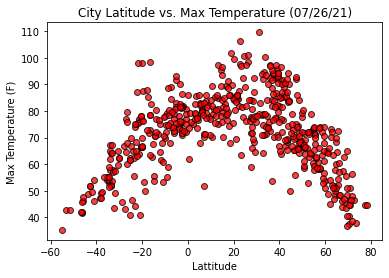

In [22]:
plt.scatter(weather_df["lat"], weather_df["max_temp"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (07/26/21)')
plt.savefig('output/latvtemp.png')
plt.show()


In [ ]:
# The graph above is showing that the closer the city is to the equator (0), 
# the higher the maximum temperature will be. There are outliers that have low 
# temperatures despite its closeness to the equator Each dot represents a city, so 
# that how far left or right it is shows the latitude (relativeness to the equator), 
# and how far up or down it is, shows the maximum temperature.

## Latitude vs. Humidity Plot

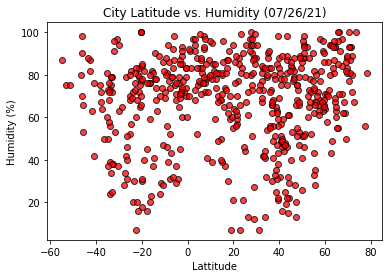

In [23]:
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (07/26/21)')
plt.savefig('output/latvhum.png')
plt.show()

In [ ]:
# The graph above is showing that the location of a city relative to the equator has
# little bearing on the humidity. Those cities that are closer to the equator tend to
# high humidity. These levels of humidity, however, are just as achievable by cities 
# farther from the equator. Each dot represents a city, so 
# that how far left or right it is shows the latitude (relativeness to the equator), 
# and how far up or down it is, shows the humidity.

## Latitude vs. Cloudiness Plot

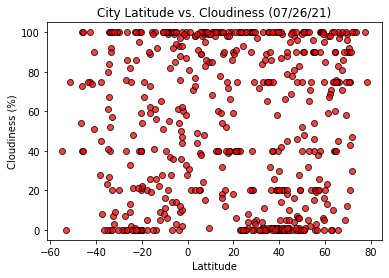

In [24]:
plt.scatter(weather_df["lat"], weather_df["cloudiness"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (07/26/21)')
plt.savefig('output/latvcloud.png')
plt.show()

In [ ]:
# The graph above is showing that the location of a city relative to the equator has
# little to no bearing on the cloudiness. This means cloudiness varies around the world.
# Each dot represents a city, so that how far left or right it is shows the 
# latitude (relativeness to the equator), and how far up or down it is, shows the 
# cloudiness.

## Latitude vs. Wind Speed Plot

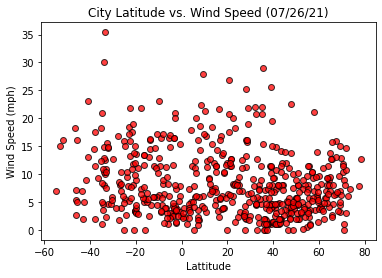

In [25]:
plt.scatter(weather_df["lat"], weather_df["wind_speed"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (07/26/21)')
plt.savefig('output/latvwind.png')
plt.show()

In [ ]:
# The graph above is showing that the location of a city relative to the equator has
# little to no bearing on the cloudiness. There is a slight pattern, however, that
# shows there is greater variablility in wind speed away from the equator.  
# Each dot represents a city, so that how far left or right it is shows the 
# latitude (relativeness to the equator), and how far up or down it is, shows the 
# wind speed.

## Linear Regression

In [13]:
# set north and south dataframes
northern_df = weather_df[weather_df['lat']>=0]
southern_df = weather_df[weather_df['lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value is: -0.6257254801169746


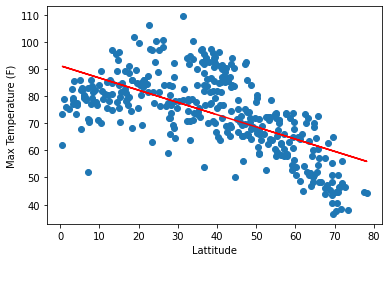

In [26]:
x_values = northern_df['lat']
y_values = northern_df['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (F)')
print(f"R-value is: {rvalue}")
plt.savefig('output/n_latvtemp.png')
plt.show()

In [ ]:
# Looking at only the nothern hemisphere, we can see the highest temperature for 
# cities gets lower, the farther north you go. With an r-value of -.63, there is
# significant correlation between the latitude and how cold the city is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value is: 0.7360277848183138


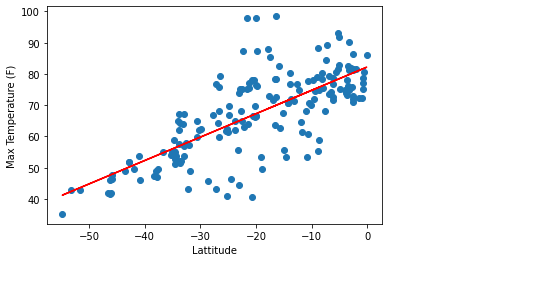

In [27]:
x_values = southern_df['lat']
y_values = southern_df['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (F)')
print(f"R-value is: {rvalue}")
plt.savefig('output/s_latvtemp.png')
plt.show()

In [ ]:
# Looking at only the southern hemisphere, we can see the highest temperature for 
# cities gets lower, the farther south you go. With an r-value of .73, there is
# significant correlation between the latitude and how cold the city is. Looking at only
# this graph compared to the other, they seem to contradict each other. In the other,
# the farther north one went, the lower the temperatures. This graph, however, shows the
# the farther north one goes, the higher the temperatures. This proves that the temperature
# is dependent on the relativeness to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value is: -0.005182032680977657


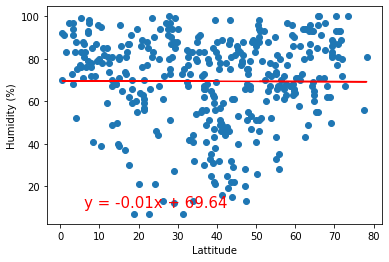

In [28]:
x_values = northern_df['lat']
y_values = northern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
print(f"R-value is: {rvalue}")
plt.savefig('output/n_latvhum.png')
plt.show()

In [ ]:
# Looking at only the nothern hemisphere, we can see the humidity does not seem to 
# change with the location of the city. With an r-value of -.005, there is
# insignificant/no correlation between the latitude and how humid the city is.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value is: 0.04532487204018141


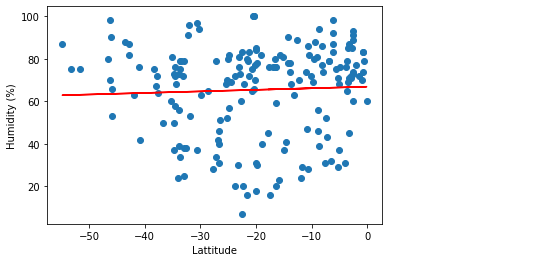

In [29]:
x_values = southern_df['lat']
y_values = southern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
print(f"R-value is: {rvalue}")
plt.savefig('output/s_latvhum.png')
plt.show()

In [ ]:
# Looking at only the southern hemisphere, we can see the humidity does not seem to 
# change much with the location of the city. With an r-value of .04, there is
# insignificant correlation between the latitude and how humid the city is. The correlation
# does seem to be higher for the southern hemisphere than the northern. It is likely, 
# however, that this is due to the fact there are less data points so each one carries
# more weight.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value is: -0.06401893723599113


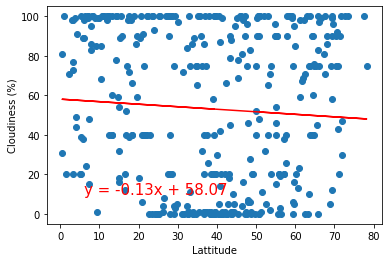

In [30]:
x_values = northern_df['lat']
y_values = northern_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
print(f"R-value is: {rvalue}")
plt.savefig('output/n_latvcloud.png')
plt.show()

In [ ]:
# Looking at only the nothern hemisphere, we can see the cloudiness does not seem to 
# change much with the location of the city. With an r-value of -.06, there is
# little correlation between the latitude and how cloudy the city is.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value is: 0.05593677690416304


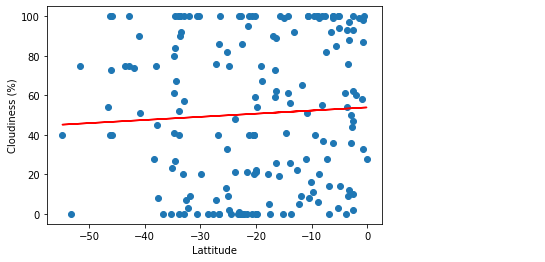

In [31]:
x_values = southern_df['lat']
y_values = southern_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
print(f"R-value is: {rvalue}")
plt.savefig('output/s_latvcloud.png')
plt.show()

In [ ]:
# Looking at only the southern hemisphere, we can see the cloudiness does not seem to 
# change much with the location of the city. With an r-value of .06, there is
# little correlation between the latitude and how cloudy the city is. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value is: -0.13170213511680148


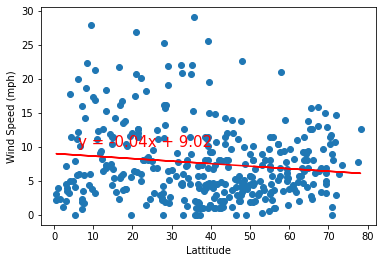

In [32]:
x_values = northern_df['lat']
y_values = northern_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
print(f"R-value is: {rvalue}")
plt.savefig('output/n_latvwind.png')
plt.show()

In [ ]:
# Looking at only the northern hemisphere, we can see the wind speed does not seem to 
# change much with the location of the city. With an r-value of .13, there is
# insignificant correlation between the latitude and how windy the city is. The correlation
# does seem to be higher for the wind speed than humidity and cloudiness, but is still
# insigficant. The little correlation there is shows that wind speeds decrease farther 
# away from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value is: -0.18604881358135897


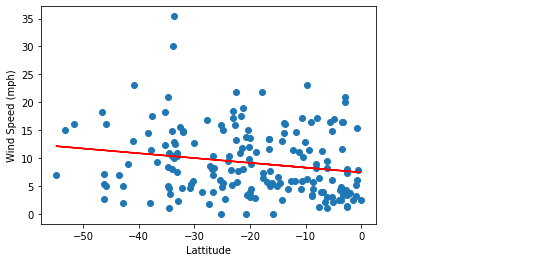

In [33]:
x_values = southern_df['lat']
y_values = southern_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
print(f"R-value is: {rvalue}")
plt.savefig('output/s_latvwind.png')
plt.show()

In [ ]:
# Looking at only the southern hemisphere, we can see the wind speed does not seem to 
# change much with the location of the city. With an r-value of -.19, there is
# insignificant correlation between the latitude and how windy the city is. The correlation
# does seem to be higher for the wind speed than humidity and cloudiness, but is still
# insigficant. The little correlation there is shows that wind speeds decrease closer 
# to the equator.